# Credit Card Default Analysis

## Question 1: Load
Programmatically download and load into your favorite analytical tool the transactions data. 
Please describe the structure of the data. Number of records and fields in each record?
Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

## Question 2: Plot
Plot a histogram of each processed account.
Report any structure you find and any hypotheses you have about that structure.

## Question 3: Data Wrangling
Deep dive into the data.
Report anything you found. 

## Question 4: Model
We are going to use classification method to classify two multiple-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Credit Card Default Detection Case where you will classify two multiple-feature groups.

## answer for Q1


## answer for Q2


## answer for Q3


## answer for Q4


**Metadata:** <br>
**id**: A unique Id field which represents a customer <br>
**X1**: Credit line <br>
**X2**: Gender (1 = male; 2 = female), nominal <br>
**X3**: Education (0 = elementary school; 1 = middle school; 2 = high school; 3 = university; 4 = master; 5 = PhD; 6 = others), nominal <br> 
**X4**: Marital status (0 = single; 1 = married; 2 = divorce; 3 = others), nominal <br>
**X5**: Age  <br>
**X6-X11**: History of past payment, 4/2005 to 9/2005, (-1 = pay one month ahead; -2 = pay two month ahead; 
0 = pay on time; Positive means the payment delayed months; 1 = delay 1 month; 2 = delay 2 months), nominal <br>
**X12-X17**: Amount of bill statement, 4/2005 to 9/2005 <br>
**X18-X23**: Amount of previous payment, 4/2005 to 9/2005 <br>
**Y**: A binary response variable to indicate whether the customer is default (1) or not (0), bool <br>

## 1. Load the data

* Perform data quality check, including data values, data types, missing values and so on
* Distinguish categorical and continuous variables: Separating the categorical feature and continuous feature allow us to perform different data processing methods to the data later

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read dataset from csv file
train_data = pd.read_csv(r"data\raw\train.csv")
test_data = pd.read_csv(r"data\raw\test.csv")

In [3]:
# add the column names in the dataframe
nameList=['id','Credit line','Gender','Education','Marital status','Age',
         'status0504','status0505','status0506','status0507','status0508','status0509',
         'bill0504','bill0505','bill0506','bill0507','bill0508','bill0509',
         'payment0504','payment0505','payment0506','payment0507','payment0508','payment0509','default']
train_data.columns=nameList
test_data.columns=nameList[:-1]

In [4]:
# make sure the full dataframe with no more than 2 decimals
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)

In [5]:
train_data.head()

,id,Credit line,Gender,Education,Marital status,Age,status0504,status0505,status0506,status0507,status0508,status0509,bill0504,bill0505,bill0506,bill0507,bill0508,bill0509,payment0504,payment0505,payment0506,payment0507,payment0508,payment0509,default
0,1,200000,2,3,1,53,0,0,0,0,0,0,126027,129008,130376,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,0,0,133825,134495,133745,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,0,0,122017,121505,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,0,0,0,0,0,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,-1,-1,1832,0,832,332,416,416,0,416,332,500,3500,832,0


In [6]:
test_data.head()

,id,Credit line,Gender,Education,Marital status,Age,status0504,status0505,status0506,status0507,status0508,status0509,bill0504,bill0505,bill0506,bill0507,bill0508,bill0509,payment0504,payment0505,payment0506,payment0507,payment0508,payment0509
0,25001,180000,1,1,2,27,-1,0,0,0,0,0,3210,13852,6482,3246,2016,2334,12000,5004,1000,1000,2300,3000
1,25002,230000,2,3,1,52,-2,-2,-2,-2,-2,-2,986,3915,2233,1410,0,0,3939,2244,1421,0,0,236
2,25003,150000,2,1,2,28,-1,-1,2,-1,-1,2,1159,2468,1159,1159,11476,10249,2468,0,1159,11476,0,2034
3,25004,160000,1,1,1,40,0,0,2,2,-1,2,4024,6484,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,25005,20000,2,2,2,26,0,0,0,0,0,0,6690,8628,8515,6584,3403,3748,2600,1500,1500,1000,402,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              25000 non-null  int64
 1   Credit line     25000 non-null  int64
 2   Gender          25000 non-null  int64
 3   Education       25000 non-null  int64
 4   Marital status  25000 non-null  int64
 5   Age             25000 non-null  int64
 6   status0504      25000 non-null  int64
 7   status0505      25000 non-null  int64
 8   status0506      25000 non-null  int64
 9   status0507      25000 non-null  int64
 10  status0508      25000 non-null  int64
 11  status0509      25000 non-null  int64
 12  bill0504        25000 non-null  int64
 13  bill0505        25000 non-null  int64
 14  bill0506        25000 non-null  int64
 15  bill0507        25000 non-null  int64
 16  bill0508        25000 non-null  int64
 17  bill0509        25000 non-null  int64
 18  payment0504     25000 non-

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              5000 non-null   int64
 1   Credit line     5000 non-null   int64
 2   Gender          5000 non-null   int64
 3   Education       5000 non-null   int64
 4   Marital status  5000 non-null   int64
 5   Age             5000 non-null   int64
 6   status0504      5000 non-null   int64
 7   status0505      5000 non-null   int64
 8   status0506      5000 non-null   int64
 9   status0507      5000 non-null   int64
 10  status0508      5000 non-null   int64
 11  status0509      5000 non-null   int64
 12  bill0504        5000 non-null   int64
 13  bill0505        5000 non-null   int64
 14  bill0506        5000 non-null   int64
 15  bill0507        5000 non-null   int64
 16  bill0508        5000 non-null   int64
 17  bill0509        5000 non-null   int64
 18  payment0504     5000 non-nul

In [9]:
# check the missing value situation
print('train: \n', train_data.isnull().sum(),"\n")
print('test: \n', test_data.isnull().sum())

train: 
 id                0
Credit line       0
Gender            0
Education         0
Marital status    0
Age               0
status0504        0
status0505        0
status0506        0
status0507        0
status0508        0
status0509        0
bill0504          0
bill0505          0
bill0506          0
bill0507          0
bill0508          0
bill0509          0
payment0504       0
payment0505       0
payment0506       0
payment0507       0
payment0508       0
payment0509       0
default           0
dtype: int64 

test: 
 id                0
Credit line       0
Gender            0
Education         0
Marital status    0
Age               0
status0504        0
status0505        0
status0506        0
status0507        0
status0508        0
status0509        0
bill0504          0
bill0505          0
bill0506          0
bill0507          0
bill0508          0
bill0509          0
payment0504       0
payment0505       0
payment0506       0
payment0507       0
payment0508       0
payment0

In [10]:
train_data.describe()

,id,Credit line,Gender,Education,Marital status,Age,status0504,status0505,status0506,status0507,status0508,status0509,bill0504,bill0505,bill0506,bill0507,bill0508,bill0509,payment0504,payment0505,payment0506,payment0507,payment0508,payment0509,default
count,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,2.50e+04,25000.00,25000.00,25000.00,25000.00,2.50e+04,25000.00,25000.00,25000.00,25000.00,25000.00
mean,12500.50,167559.19,1.61,1.85,1.55,35.48,-0.02,-0.14,-0.17,-0.22,-0.27,-0.29,51164.18,49152.44,4.71e+04,43266.20,40289.26,38842.11,5642.77,5.98e+03,5231.98,4873.48,4793.89,5248.53,0.22
std,7217.02,129634.88,0.49,0.79,0.52,9.23,1.12,1.19,1.19,1.16,1.13,1.15,73901.99,71493.02,6.99e+04,64561.64,60950.00,59567.84,15745.37,2.29e+04,16331.19,15649.70,15143.12,17972.26,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-6.15e+04,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,6250.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3543.50,2936.75,2.62e+03,2307.00,1740.00,1247.75,977.25,8.36e+02,390.00,291.00,263.25,117.75,0.00
50%,12500.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22284.50,20879.00,2.00e+04,18983.00,18041.00,17000.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00
75%,18750.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,66671.75,63557.50,5.98e+04,53982.00,49925.75,49016.50,5022.00,5.00e+03,4574.25,4015.00,4056.25,4000.00,0.00
max,25000.00,800000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,746814.00,743970.00,1.66e+06,706864.00,823540.00,699944.00,505000.00,1.68e+06,508229.00,528897.00,426529.00,528666.00,1.00


In [11]:
test_data.describe()

,id,Credit line,Gender,Education,Marital status,Age,status0504,status0505,status0506,status0507,status0508,status0509,bill0504,bill0505,bill0506,bill0507,bill0508,bill0509,payment0504,payment0505,payment0506,payment0507,payment0508,payment0509
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5.00e+03,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5.00e+03,5000.00,5000.00,5000.00,5000.00
mean,27500.50,167110.00,1.59,1.85,1.55,35.50,-2.00e-04,-0.11,-0.15,-0.20,-0.27,-0.28,51519.09,49312.27,46793.87,43246.69,40422.10,39020.00,5767.63,5.65e+03,5194.19,4589.09,4826.88,5050.36
std,1443.52,130322.46,0.49,0.79,0.52,9.17,1.15e+00,1.22,1.21,1.19,1.14,1.16,72297.05,69562.40,66629.99,63182.88,60033.01,59491.12,20162.67,2.36e+04,22947.49,15747.65,15938.60,16770.33
min,25001.00,10000.00,1.00,0.00,0.00,21.00,-2.00e+00,-2.00,-2.00,-2.00,-2.00,-2.00,-14386.00,-67526.00,-157264.00,-65167.00,-46627.00,-46627.00,0.00,0.00e+00,0.00,0.00,0.00,0.00
25%,26250.75,50000.00,1.00,1.00,1.00,28.00,-1.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,3653.00,3276.00,3018.25,2442.25,1923.00,1291.25,1000.00,8.26e+02,432.75,311.75,200.00,118.25
50%,27500.50,140000.00,2.00,2.00,2.00,34.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,23219.50,22884.00,20890.50,19375.00,18458.00,17305.50,2130.50,2.01e+03,1800.00,1500.00,1500.00,1500.00
75%,28750.25,240000.00,2.00,2.00,2.00,41.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,69390.50,65590.75,61944.00,56515.25,51752.00,49856.75,5000.00,5.00e+03,4337.75,4001.00,4000.00,4000.00
max,30000.00,1000000.00,2.00,6.00,3.00,75.00,8.00e+00,7.00,7.00,8.00,7.00,7.00,964511.00,983931.00,689643.00,891586.00,927171.00,961664.00,873552.00,1.22e+06,896040.00,621000.00,330982.00,372495.00


In [12]:
# check the output of the code above
con_v=['Credit line','Age',
       'bill0504','bill0505','bill0506','bill0507','bill0508','bill0509',
       'payment0504','payment0505','payment0506','payment0507','payment0508','payment0509']
cat_v=['Gender','Education','Marital status','status0504','status0505','status0506','status0507','status0508','status0509']
print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v)

The continuous variables:  ['Credit line', 'Age', 'bill0504', 'bill0505', 'bill0506', 'bill0507', 'bill0508', 'bill0509', 'payment0504', 'payment0505', 'payment0506', 'payment0507', 'payment0508', 'payment0509'] 

The categorical variables:  ['Gender', 'Education', 'Marital status', 'status0504', 'status0505', 'status0506', 'status0507', 'status0508', 'status0509']


## 2. Plotting for basic feature analysis

* Check the pattern differences between the training data and testing data <br>
The reason why we want to do this is that we always want to make sure that the features/variables in the 
training and testing set are draw from the same distribution. Only when that's true, we can apply whatever
machine learning algorithm on the data set. Otherwise, it would just make no sense to us to apply 
any analysis on the data
* Check the contriubtion of features in training data to the difference classes in Y <br>
The useful feature should show a different contribution to the difference classes in Y
* Check if there is a correlation between each feature <br>
If yes, we will choose the feature has more variance
* Check the pattern of the label <br>
we want to know if the label set is balanced or not. If it is imbalance, we would like to address the issue and adjust our model accordingly

Method to deal with imbalanced data
1. Choose a good metrics:  <br/> Confusion Matrix: precision/Recall/F1-score
2. Resampling Your Dataset:
  * You can add copies of instances from the under-represented class called over-sampling
  * You can delete instances from the over-represented class, called under-sampling
  * imbalanced-learn package: https://github.com/scikit-learn-contrib/imbalanced-learn
3. Tune the class weight parameter

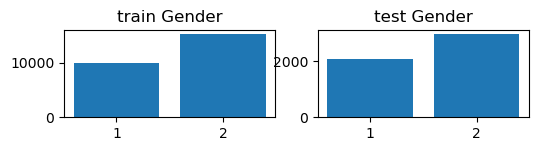

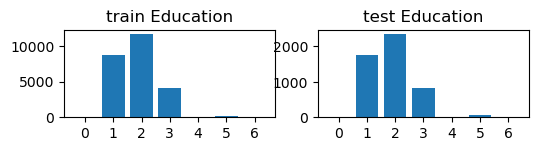

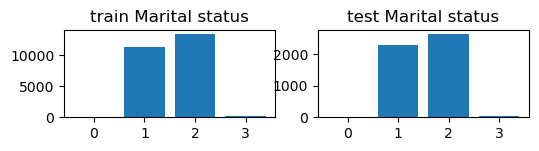

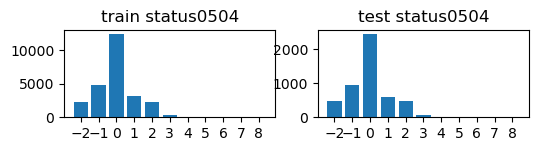

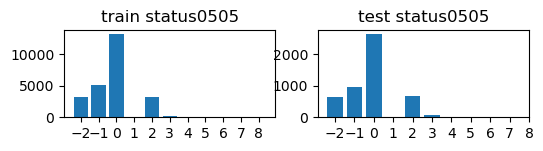

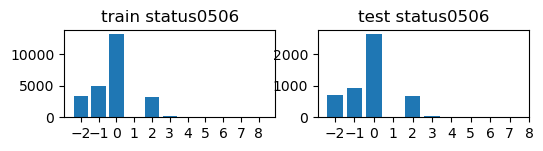

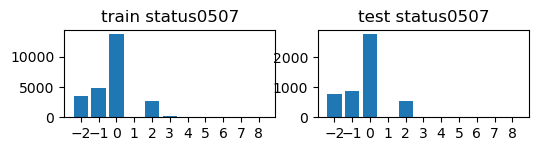

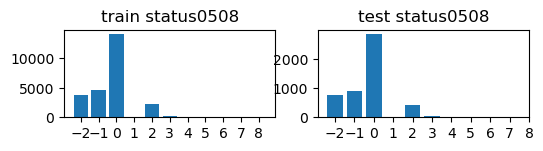

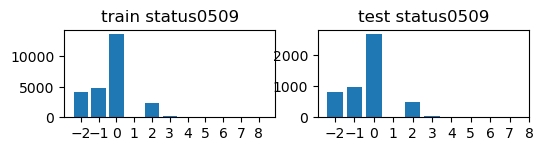

In [13]:
# visualize the distribution of the categorical columns 
count=1 # setup a counter to tell the index of the current plot

for i in range(len(cat_v)): # for each column in the categorical columns
    fig = plt.figure(figsize=(6,12)) # setup a "canvas" with size 6, 12
    
    plt.subplot(len(cat_v),2,count) # first plot the left one in the current row
    plt.bar(train_data[cat_v[i]].value_counts().index, train_data[cat_v[i]].value_counts().values) 
    plt.xticks(np.arange(min(train_data[cat_v[i]].value_counts().index),max(train_data[cat_v[i]].value_counts().index)+1,1))
    plt.title("train "+cat_v[i]) 
    
    plt.subplot(len(cat_v),2,count+1) # second plot the right one in the current row
    plt.bar(test_data[cat_v[i]].value_counts().index, test_data[cat_v[i]].value_counts().values) 
    plt.xticks(np.arange(min(train_data[cat_v[i]].value_counts().index),max(train_data[cat_v[i]].value_counts().index)+1,1))
    plt.title("test "+cat_v[i]) 
    count+=2 # plus two to the counter variable letting it know that we've already plottd two

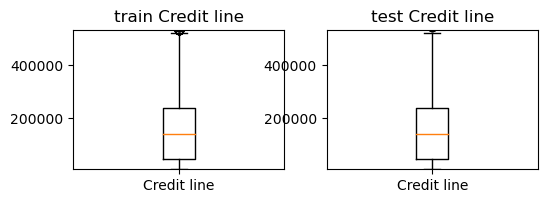

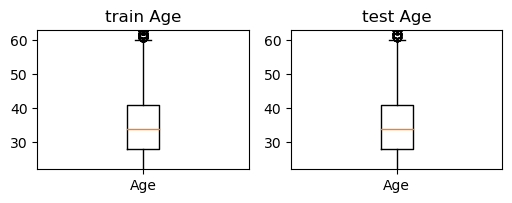

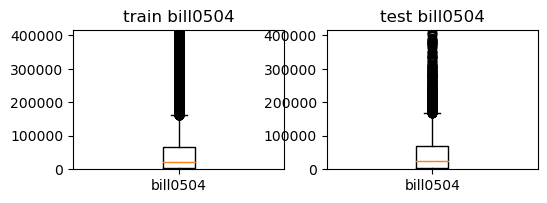

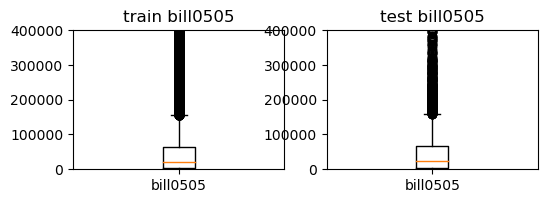

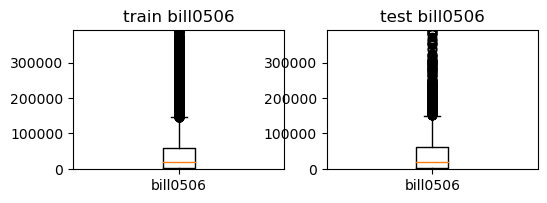

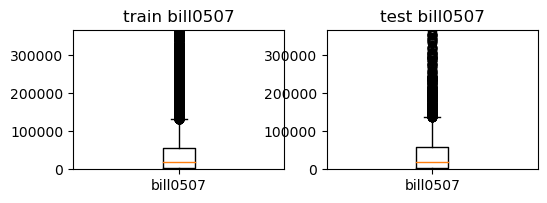

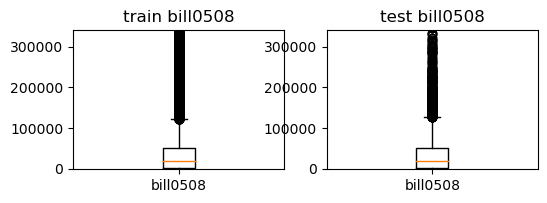

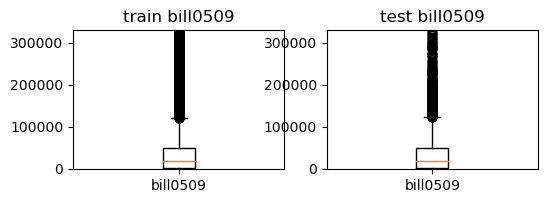

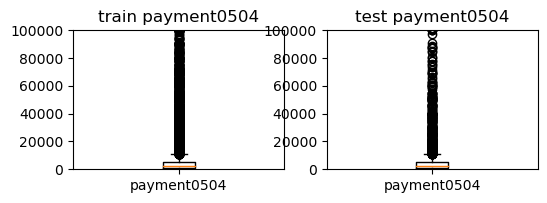

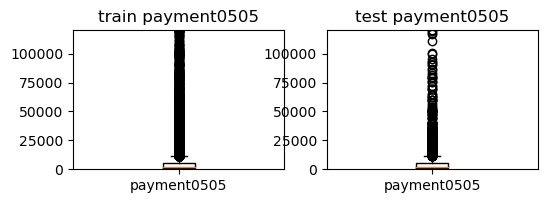

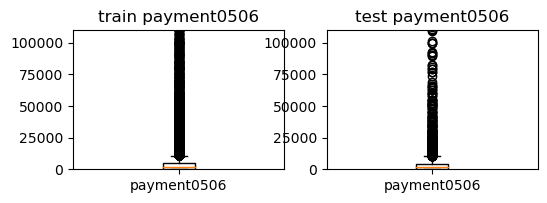

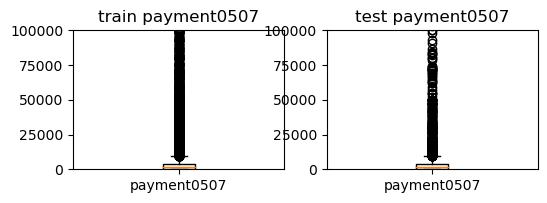

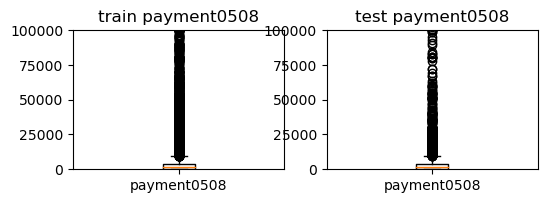

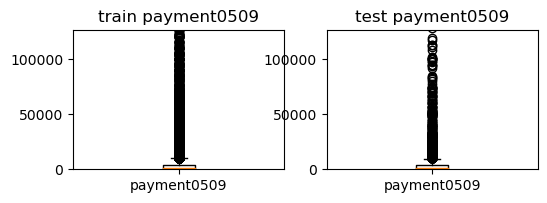

In [14]:
# visualized the continuous variables, similar with the code above
count=1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(6,30))
    plt.subplot(len(con_v),2,count)
    plt.boxplot(train_data[con_v[i]]) 
    plt.ylim(np.percentile(train_data[con_v[i]], 0.5), np.percentile(train_data[con_v[i]], 99.5))
    plt.xticks([1],[con_v[i]])
    plt.title("train "+con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.boxplot(test_data[con_v[i]])
    plt.ylim(np.percentile(train_data[con_v[i]], 0.5), np.percentile(train_data[con_v[i]], 99.5))
    plt.xticks([1],[con_v[i]])
    plt.title("test "+con_v[i])
    count+=2

In [15]:
#categorize the age
train_copy=train_data.copy()
train_copy['Age_class']=''
train_copy.loc[train_copy['Age']<30,'Age_class']='<30'
train_copy.loc[(train_copy['Age']>=30)&(train_copy['Age']<40),'Age_class']='30-40'
train_copy.loc[(train_copy['Age']>=40)&(train_copy['Age']<50),'Age_class']='40-50'
train_copy.loc[(train_copy['Age']>=50)&(train_copy['Age']<60),'Age_class']='50-60'
train_copy.loc[(train_copy['Age']>=60)&(train_copy['Age']<70),'Age_class']='60-70'
train_copy.loc[train_copy['Age']>=70,'Age_class']='>70'

In [16]:
#categorize the credit line
train_copy['CreditLine_class']=''
train_copy.loc[train_copy['Credit line']<25000,'CreditLine_class']='<25000'
train_copy.loc[(train_copy['Credit line']>=25000)&(train_copy['Credit line']<50000),'CreditLine_class']='25000-50000'
train_copy.loc[(train_copy['Credit line']>=50000)&(train_copy['Credit line']<100000),'CreditLine_class']='50000-100000'
train_copy.loc[(train_copy['Credit line']>=100000)&(train_copy['Credit line']<250000),'CreditLine_class']='100000-250000'
train_copy.loc[(train_copy['Credit line']>=250000)&(train_copy['Credit line']<500000),'CreditLine_class']='250000-500000'
train_copy.loc[train_copy['Credit line']>=500000,'CreditLine_class']='>500000'

In [17]:
train_copy['Gender'].replace({1:'male',2:'female'},inplace=True)
train_copy['Education'].replace({0: 'elementary school', 
                                 1: 'middle school', 
                                 2: 'high school', 
                                 3: 'university', 
                                 4: 'master', 
                                 5: 'PhD', 
                                 6: 'others'},inplace=True)
train_copy['Marital status'].replace({0: 'single',
                                      1: 'married',
                                      2: 'divorce',
                                      3: 'others'},inplace=True)

In [18]:
pd.crosstab(train_copy.default, [train_copy.Gender, train_copy.Age_class], margins=True, margins_name="Total",normalize=True).round(2)

Gender    female                               male                          \
Age_class  30-40 40-50 50-60 60-70   <30  >70 30-40 40-50 50-60 60-70   <30   
default                                                                       
0           0.18  0.10  0.03   0.0  0.17  0.0  0.12  0.07  0.03  0.00  0.08   
1           0.04  0.03  0.01   0.0  0.05  0.0  0.04  0.02  0.01  0.00  0.03   
Total       0.22  0.12  0.04   0.0  0.21  0.0  0.15  0.09  0.04  0.01  0.11   

Gender         Total  
Age_class  >70        
default               
0          0.0  0.78  
1          0.0  0.22  
Total      0.0  1.00

In [19]:
pd.crosstab(train_copy.default, [train_copy.Gender, train_copy.CreditLine_class], margins=True, margins_name="Total",normalize=True).round(2)

Gender                  female                                                \
CreditLine_class 100000-250000 25000-50000 250000-500000 50000-100000 <25000   
default                                                                        
0                         0.20        0.02          0.11         0.11   0.02   
1                         0.04        0.01          0.02         0.04   0.01   
Total                     0.25        0.04          0.12         0.14   0.04   

Gender                            male                                         \
CreditLine_class >500000 100000-250000 25000-50000 250000-500000 50000-100000   
default                                                                         
0                   0.01          0.10        0.01          0.07         0.07   
1                   0.00          0.03        0.01          0.01         0.02   
Total               0.02          0.14        0.02          0.08         0.09   

Gender                          Total  
CreditLine_class <25000 >500000        
default                                
0                  0.03    0.01  0.78  
1                  0.02    0.00  0.22  
Total              0.05    0.01  1.00

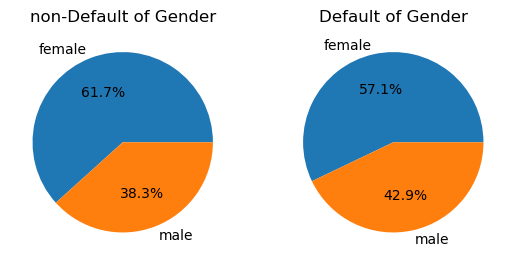

In [20]:
#pie plot to present the feature pattern of non-default and default
def pie(data,name):
    noD=data.loc[data['default']==0,:]
    D=data.loc[data['default']!=0,:]
    fig, axs = plt.subplots(1,2)
    axs[0].pie(noD.loc[:,name].value_counts(),labels=noD.loc[:,name].value_counts().index.tolist(), autopct='%1.1f%%')
    axs[0].set_title('non-Default of '+name)
    axs[1].pie(D.loc[:,name].value_counts(),labels=D.loc[:,name].value_counts().index.tolist(), autopct='%1.1f%%')
    axs[1].set_title('Default of '+name)
pie(train_copy,'Gender')

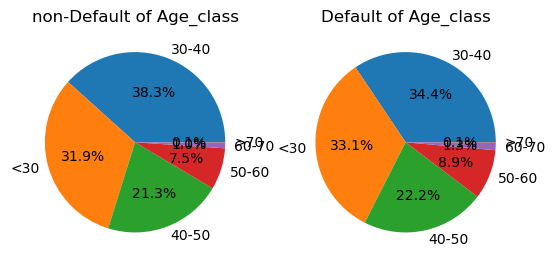

In [21]:
pie(train_copy,'Age_class')

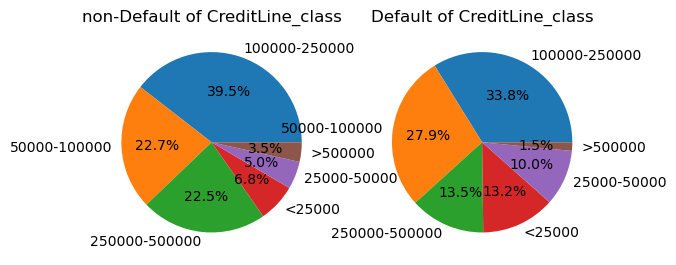

In [22]:
pie(train_copy,'CreditLine_class')

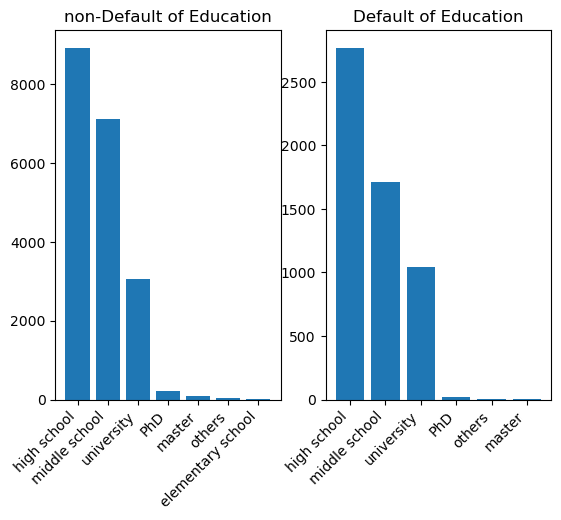

In [23]:
#bar plot to present the feature pattern of non-default and default
def bar(data,name):
    noD=data.loc[data['default']==0,:]
    D=data.loc[data['default']!=0,:]
    fig, axs = plt.subplots(1,2)
    axs[0].bar(noD.loc[:,name].value_counts().index, noD.loc[:,name].value_counts().values)
    axs[0].set_title('non-Default of '+name)
    axs[0].set_xticklabels(noD.loc[:,name].value_counts().index,rotation = 45,ha='right')
    axs[1].bar(D.loc[:,name].value_counts().index, D.loc[:,name].value_counts().values)
    axs[1].set_title('Default of '+name)
    axs[1].set_xticklabels(D.loc[:,name].value_counts().index,rotation = 45,ha='right')
bar(train_copy,'Education')

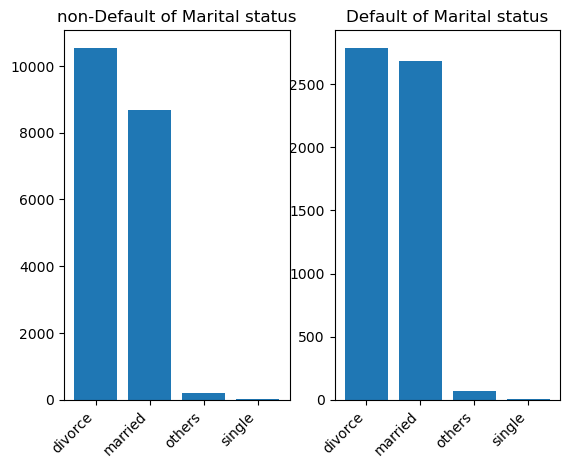

In [24]:
bar(train_copy,'Marital status')

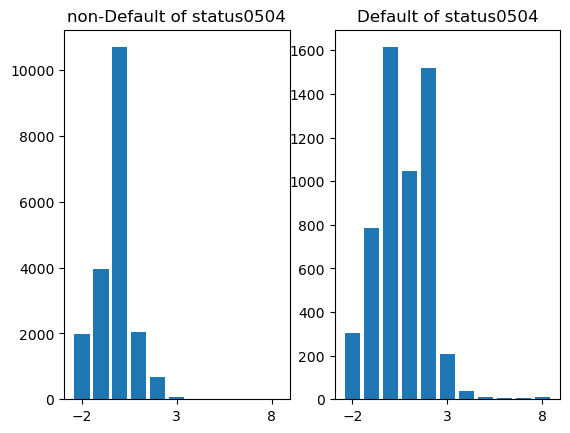

In [25]:
#bar plot to present the feature pattern of non-default and default
def barM(data,name):
    noD=data.loc[data['default']==0,:]
    D=data.loc[data['default']!=0,:]
    fig, axs = plt.subplots(1,2)
    axs[0].bar(noD.loc[:,name].value_counts().index, noD.loc[:,name].value_counts().values)
    axs[0].set_title('non-Default of '+name)
    axs[0].set_xticks(np.arange(min(noD.loc[:,name].value_counts().index),max(noD.loc[:,name].value_counts().index+1),5))
    axs[1].bar(D.loc[:,name].value_counts().index, D.loc[:,name].value_counts().values)
    axs[1].set_title('Default of '+name)
    axs[1].set_xticks(np.arange(min(D.loc[:,name].value_counts().index),max(noD.loc[:,name].value_counts().index+1),5))
barM(train_copy,'status0504')

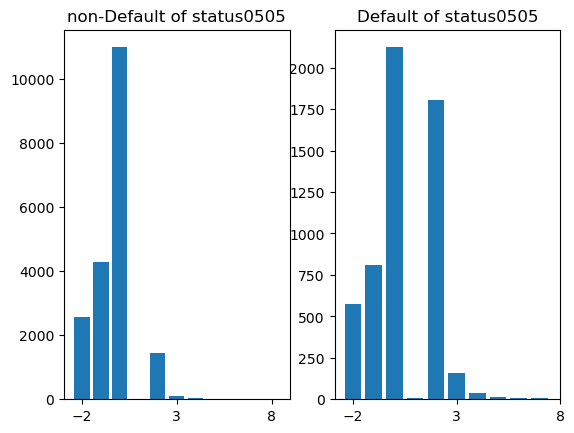

In [26]:
barM(train_copy,'status0505')

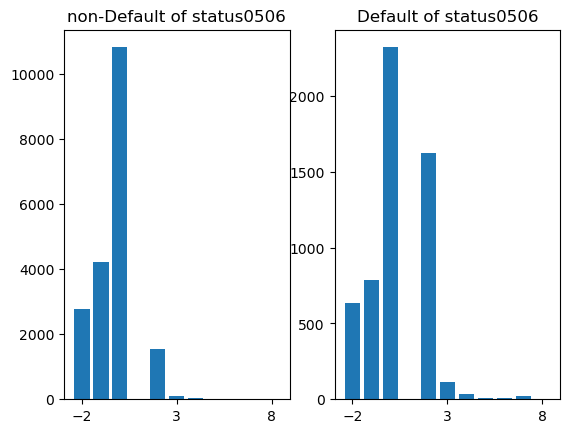

In [27]:
barM(train_copy,'status0506')

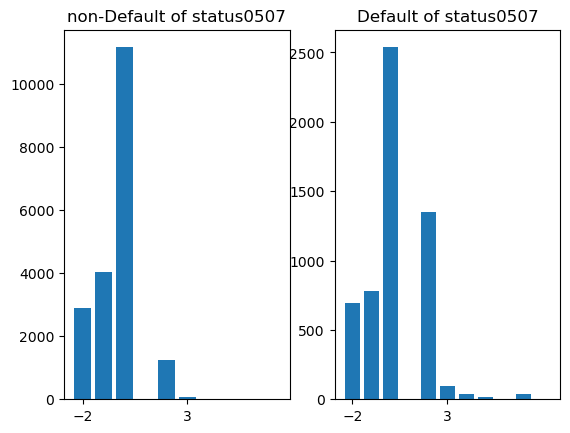

In [28]:
barM(train_copy,'status0507')

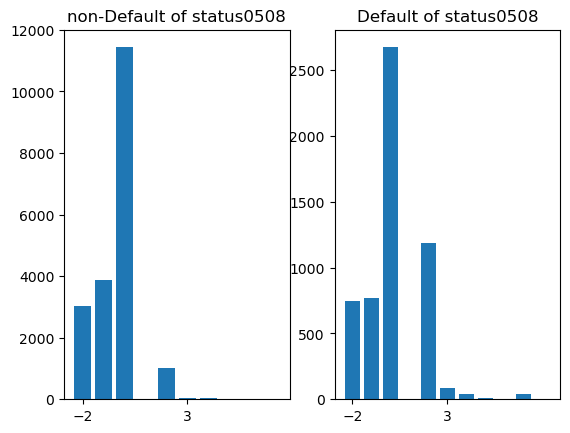

In [29]:
barM(train_copy,'status0508')

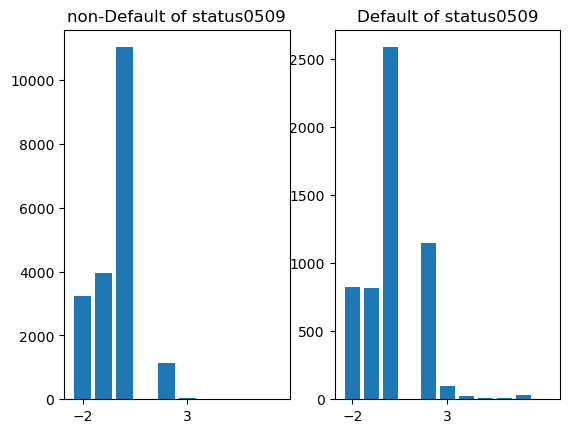

In [30]:
barM(train_copy,'status0509')

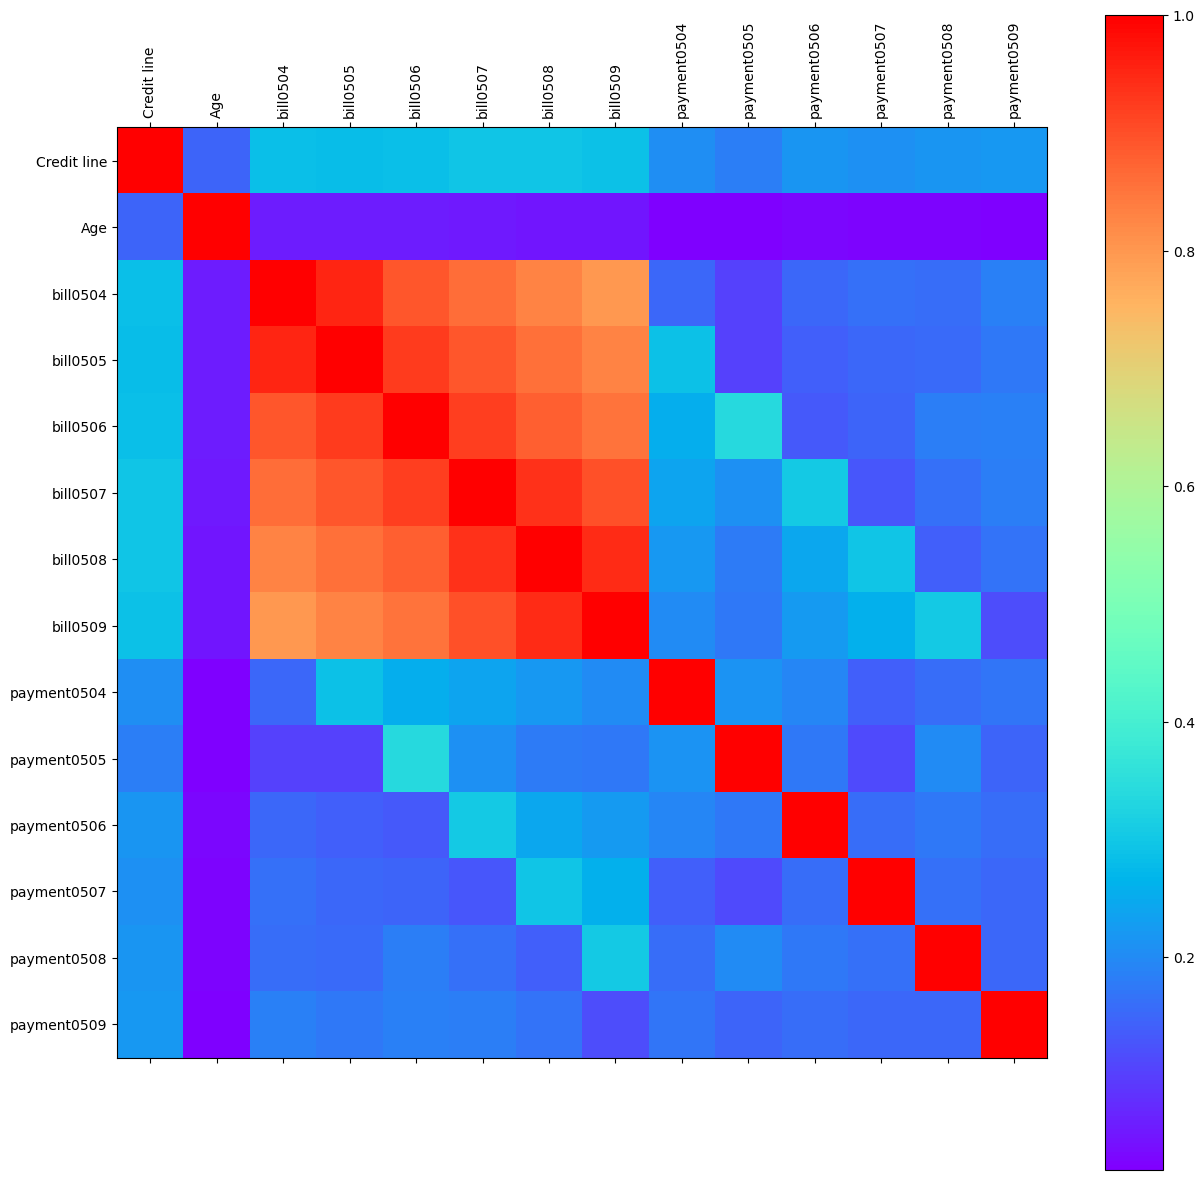

In [31]:
# next we check the correlation between features
# it is important to know the correlation among them since high correlation 
# may have bad influence to machine leanring models

def plot_corr(df,size=15):
    corr = df.corr() # calculate correlation matrix using pandas dataframe's corr() method
    fig, ax = plt.subplots(figsize=(size, size)) # setup a "canvas" with size as a parameter to make plots on it
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow')) # plot the matrix of correlation coefficient 
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical') # give the ticks on the x axis some names
    plt.yticks(range(len(corr.columns)), corr.columns) # give the ticks on the y axis some names
    plt.colorbar(cax) # plot the color bar
plot_corr(train_data[con_v]) # now call the function we just defined 

In [32]:
# check the ratio of between the target labels
train_copy['default'].value_counts(normalize=True)

0    0.78
1    0.22
Name: default, dtype: float64

## 3. Data Wrangling
* Build new features from the existing feature
* Analyze the features to see if it is importance in the classification  

In [33]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25000 non-null  int64 
 1   Credit line       25000 non-null  int64 
 2   Gender            25000 non-null  object
 3   Education         25000 non-null  object
 4   Marital status    25000 non-null  object
 5   Age               25000 non-null  int64 
 6   status0504        25000 non-null  int64 
 7   status0505        25000 non-null  int64 
 8   status0506        25000 non-null  int64 
 9   status0507        25000 non-null  int64 
 10  status0508        25000 non-null  int64 
 11  status0509        25000 non-null  int64 
 12  bill0504          25000 non-null  int64 
 13  bill0505          25000 non-null  int64 
 14  bill0506          25000 non-null  int64 
 15  bill0507          25000 non-null  int64 
 16  bill0508          25000 non-null  int64 
 17  bill0509    

In [34]:
# build new feature status####_class, which is derived from status####
# value smaller than 0 is -1, value larger than 2 is 3, value between 0 and 2 is 1
train_copy['status0504_class']=0
train_copy['status0505_class']=0
train_copy['status0506_class']=0
train_copy['status0507_class']=0
train_copy['status0508_class']=0
train_copy['status0509_class']=0
for col in ['status0504','status0505','status0506','status0507','status0508','status0509']:
    train_copy.loc[train_copy[col]>2,col+'_class']=3
    train_copy.loc[train_copy[col]<0,col+'_class']=-1
    train_copy.loc[(train_copy[col]<=2)&(train_copy[col]>=0),col+'_class']=1

In [35]:
# status_sum is the sum of status0504 ot status0509
train_copy['status_sum']=(train_copy['status0504']+train_copy['status0505']+
                          train_copy['status0506']+train_copy['status0507']+
                          train_copy['status0508']+train_copy['status0509'])

In [36]:
#payment_diff_#### is the difference between bill#### and payment####
train_copy['payment_diff_05']=train_copy['bill0504']-train_copy['payment0505']
train_copy['payment_diff_06']=train_copy['bill0505']-train_copy['payment0506']
train_copy['payment_diff_07']=train_copy['bill0506']-train_copy['payment0507']
train_copy['payment_diff_08']=train_copy['bill0507']-train_copy['payment0508']
train_copy['payment_diff_09']=train_copy['bill0508']-train_copy['payment0509']

In [37]:
train_copy.describe()

,id,Credit line,Age,status0504,status0505,status0506,status0507,status0508,status0509,bill0504,bill0505,bill0506,bill0507,bill0508,bill0509,payment0504,payment0505,payment0506,payment0507,payment0508,payment0509,default,status0504_class,status0505_class,status0506_class,status0507_class,status0508_class,status0509_class,status_sum,payment_diff_05,payment_diff_06,payment_diff_07,payment_diff_08,payment_diff_09
count,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,2.50e+04,25000.00,25000.00,25000.00,25000.00,2.50e+04,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,2.50e+04,25000.00,2.50e+04,25000.00,25000.00
mean,12500.50,167559.19,35.48,-0.02,-0.14,-0.17,-0.22,-0.27,-0.29,51164.18,49152.44,4.71e+04,43266.20,40289.26,38842.11,5642.77,5.98e+03,5231.98,4873.48,4793.89,5248.53,0.22,0.47,0.37,0.35,0.35,0.35,0.31,-1.11,4.52e+04,43920.46,4.22e+04,38472.31,35040.73
std,7217.02,129634.88,9.23,1.12,1.19,1.19,1.16,1.13,1.15,73901.99,71493.02,6.99e+04,64561.64,60950.00,59567.84,15745.37,2.29e+04,16331.19,15649.70,15143.12,17972.26,0.42,0.95,0.99,0.99,0.98,0.98,0.99,5.87,7.51e+04,71077.84,6.93e+04,63884.52,60572.99
min,1.00,10000.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-6.15e+04,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-12.00,-1.68e+06,-407040.00,-4.80e+05,-389888.00,-467556.00
25%,6250.75,50000.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3543.50,2936.75,2.62e+03,2307.00,1740.00,1247.75,977.25,8.36e+02,390.00,291.00,263.25,117.75,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-5.00,7.10e+02,483.25,4.73e+02,172.00,0.00
50%,12500.50,140000.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22284.50,20879.00,2.00e+04,18983.00,18041.00,17000.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.85e+04,18279.00,1.80e+04,16685.50,15130.50
75%,18750.25,240000.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,66671.75,63557.50,5.98e+04,53982.00,49925.75,49016.50,5022.00,5.00e+03,4574.25,4015.00,4056.25,4000.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,6.16e+04,59048.50,5.57e+04,49634.75,46732.50
max,25000.00,800000.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,746814.00,743970.00,1.66e+06,706864.00,823540.00,699944.00,505000.00,1.68e+06,508229.00,528897.00,426529.00,528666.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,36.00,7.30e+05,730965.00,1.57e+06,691864.00,805381.00


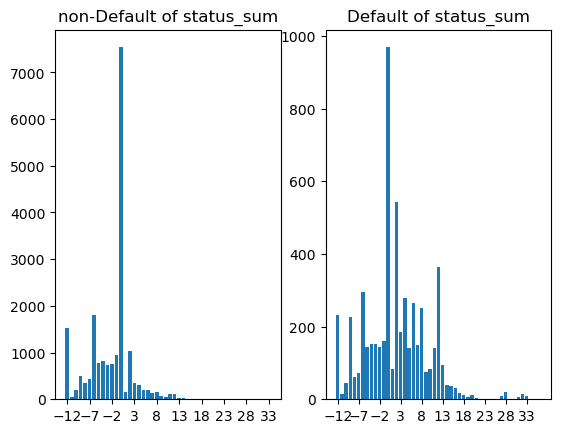

In [38]:
barM(train_copy,'status_sum')

In [39]:
pd.pivot_table(train_copy,index=["default"],values=["status_sum"],columns=["Age_class"],aggfunc=[np.mean,len])

mean                                      len              \
          status_sum                               status_sum               
Age_class      30-40 40-50 50-60 60-70   <30   >70      30-40 40-50 50-60   
default                                                                     
0              -2.40 -2.46 -1.95 -1.13 -1.21 -1.07       7456  4139  1453   
1               1.24  1.77  2.38 -0.61  2.84 -3.83       1908  1230   494   

                           
                           
Age_class 60-70   <30 >70  
default                    
0           194  6196  14  
1            72  1838   6

In [40]:
pd.pivot_table(train_copy,index=["default"],values=["status_sum"],columns=["CreditLine_class"],aggfunc=[np.mean,len])

mean                                                \
                    status_sum                                                 
CreditLine_class 100000-250000 25000-50000 250000-500000 50000-100000 <25000   
default                                                                        
0                        -2.53        0.79         -3.71        -0.42   0.47   
1                         0.70        5.43         -2.36         3.38   4.51   

                                   len                                         \
                            status_sum                                          
CreditLine_class >500000 100000-250000 25000-50000 250000-500000 50000-100000   
default                                                                         
0                  -3.58          7682         965          4386         4410   
1                  -2.73          1877         557           748         1547   

                                 
                                 
CreditLine_class <25000 >500000  
default                          
0                  1328     681  
1                   734      85

In [41]:
pd.pivot_table(train_copy,index=["default"],values=["status_sum"],columns=["Gender"],aggfunc=[np.mean,len])

mean              len      
        status_sum       status_sum      
Gender      female  male     female  male
default                                  
0            -2.24 -1.58      12001  7451
1             1.55  2.51       3168  2380

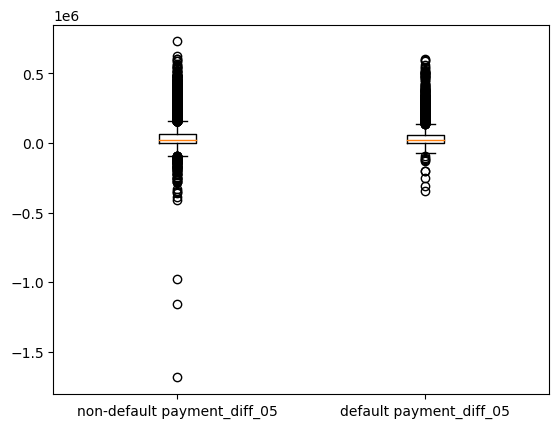

In [42]:
def boxplot(data,name):
    plt.boxplot([data.loc[data['default']==0,name],data.loc[data['default']!=0,name]])
    plt.xticks([1,2],['non-default '+name,'default '+name])
boxplot(train_copy,'payment_diff_05')

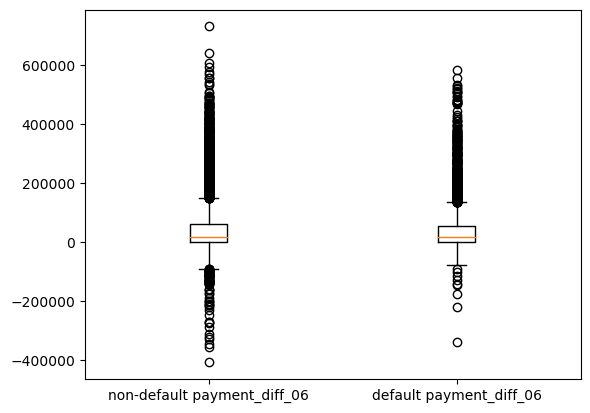

In [43]:
boxplot(train_copy,'payment_diff_06')

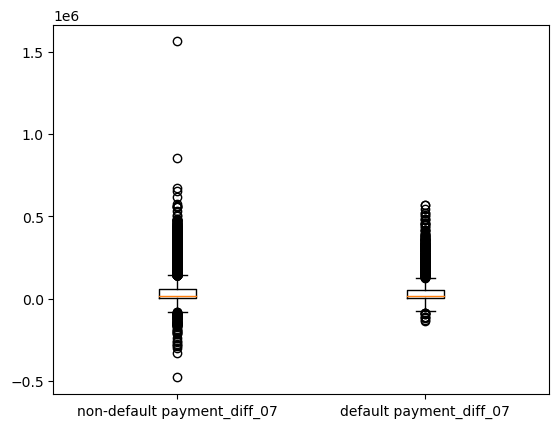

In [44]:
boxplot(train_copy,'payment_diff_07')

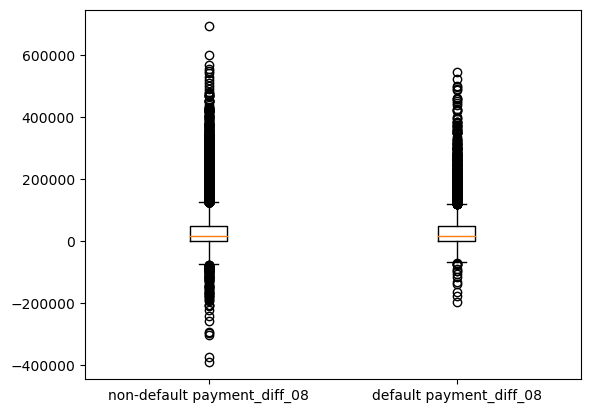

In [45]:
boxplot(train_copy,'payment_diff_08')

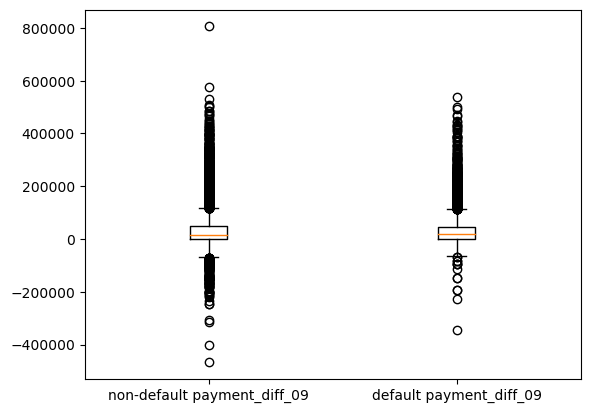

In [46]:
boxplot(train_copy,'payment_diff_09')

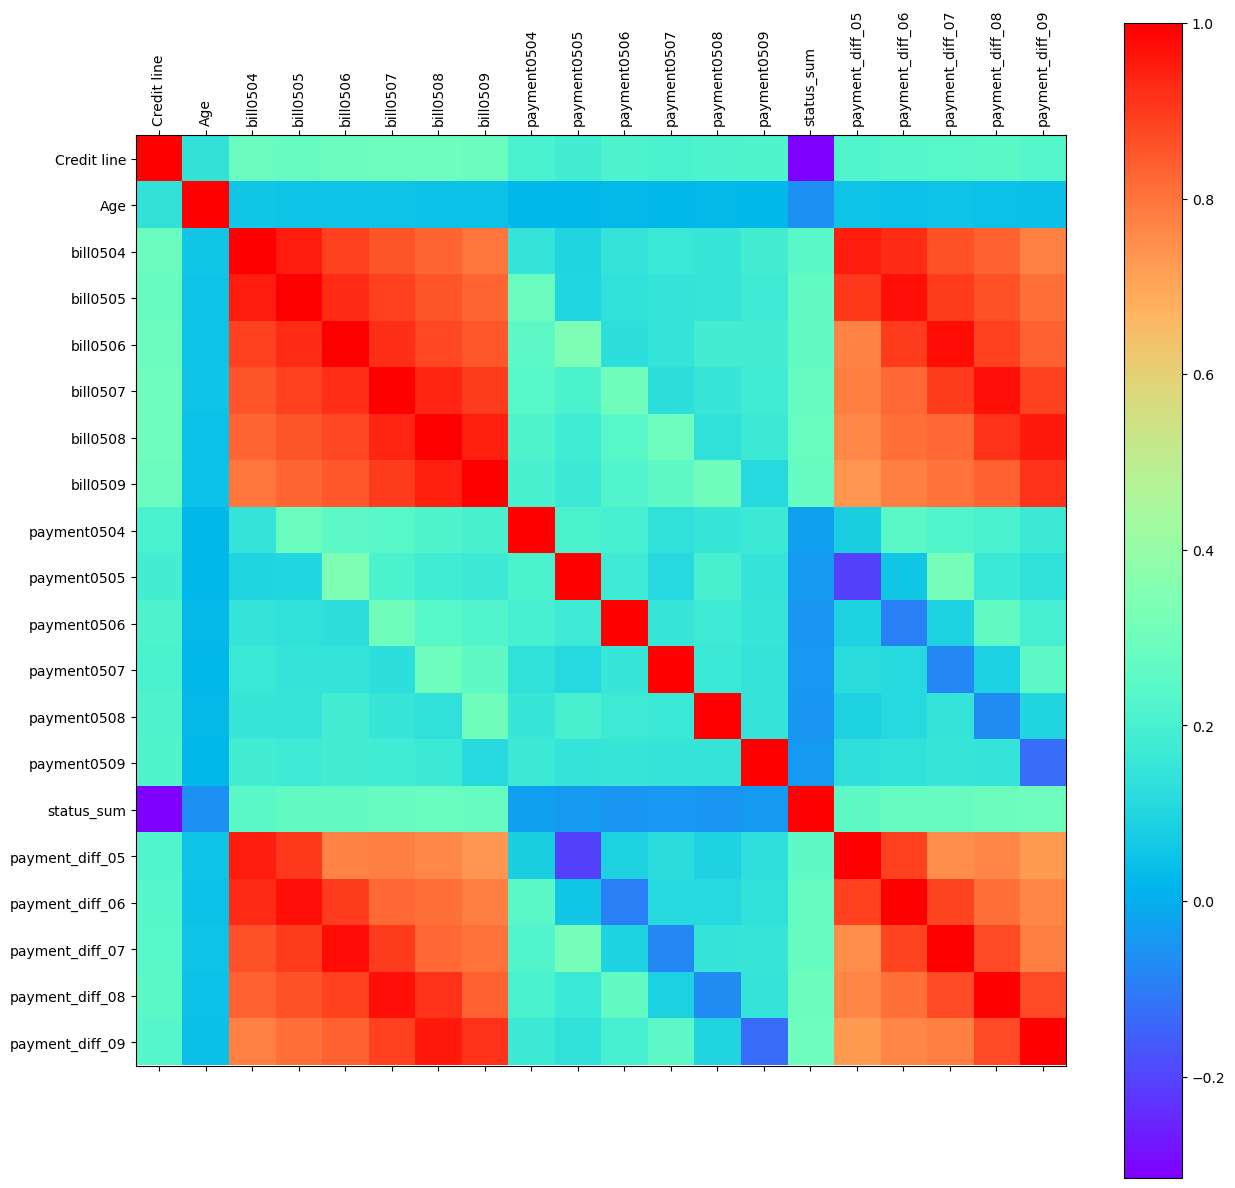

In [47]:
#pearson correlation of continous features
con_v.extend(['status_sum','payment_diff_05','payment_diff_06','payment_diff_07','payment_diff_08','payment_diff_09'])
plot_corr(train_copy[con_v])

In [48]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25000 non-null  int64 
 1   Credit line       25000 non-null  int64 
 2   Gender            25000 non-null  object
 3   Education         25000 non-null  object
 4   Marital status    25000 non-null  object
 5   Age               25000 non-null  int64 
 6   status0504        25000 non-null  int64 
 7   status0505        25000 non-null  int64 
 8   status0506        25000 non-null  int64 
 9   status0507        25000 non-null  int64 
 10  status0508        25000 non-null  int64 
 11  status0509        25000 non-null  int64 
 12  bill0504          25000 non-null  int64 
 13  bill0505          25000 non-null  int64 
 14  bill0506          25000 non-null  int64 
 15  bill0507          25000 non-null  int64 
 16  bill0508          25000 non-null  int64 
 17  bill0509    

## 4. Build a baseline model
* A baseline model is a good indicator for us to understand how a model would perform in the current situation
* We want the baseline model tell us two main things
    * Whether the features are overall okay for a predictive analysis purpose
    * How would a raw model perform on the current feature set

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [50]:
#drop off the irrelative or duplicated features
train_in=train_copy.drop(['Credit line','Age','status0504','status0505','status0506','status0507','status0508','status0509',
                          'bill0504','bill0505','bill0506','bill0507','bill0508','bill0509',
                          'payment0504','payment0505','payment0506','payment0507','payment0508','payment0509'],axis=1)

In [51]:
#label the binary features
le = LabelEncoder()
en_cols=['Gender','Age_class','CreditLine_class']
for col in en_cols:
    train_in[col] = le.fit_transform(train_in[col])

In [52]:
train_in = pd.get_dummies(data = train_in,columns = ['Education','Marital status'])

In [53]:
#standardize the numerical features
std = StandardScaler()
std_cols=['status0504_class', 'status0505_class',
       'status0506_class', 'status0507_class', 'status0508_class',
       'status0509_class', 'status_sum', 'payment_diff_05', 'payment_diff_06',
       'payment_diff_07', 'payment_diff_08', 'payment_diff_09']
train_in[std_cols] = std.fit_transform(train_in[std_cols])

In [54]:
train_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           25000 non-null  int64  
 1   Gender                       25000 non-null  int32  
 2   default                      25000 non-null  int64  
 3   Age_class                    25000 non-null  int32  
 4   CreditLine_class             25000 non-null  int32  
 5   status0504_class             25000 non-null  float64
 6   status0505_class             25000 non-null  float64
 7   status0506_class             25000 non-null  float64
 8   status0507_class             25000 non-null  float64
 9   status0508_class             25000 non-null  float64
 10  status0509_class             25000 non-null  float64
 11  status_sum                   25000 non-null  float64
 12  payment_diff_05              25000 non-null  float64
 13  payment_diff_06 

In [55]:
from sklearn.feature_selection import chi2
for index in ['Gender', 'Age_class', 'CreditLine_class',
       'Education_elementary school', 'Education_high school',
       'Education_master', 'Education_middle school', 'Education_others',
       'Education_university', 'Marital status_divorce',
       'Marital status_married', 'Marital status_others',
       'Marital status_single']:
    print(index)
    print(index,': ',chi2(train_in[index].to_numpy().reshape(-1,1),train_in.default))

Gender
Gender :  (array([23.16576569]), array([1.48619703e-06]))
Age_class
Age_class :  (array([25.25192365]), array([5.0309368e-07]))
CreditLine_class
CreditLine_class :  (array([87.09553232]), array([1.03403869e-20]))
Education_elementary school
Education_elementary school :  (array([3.42257866]), array([0.06431049]))
Education_high school
Education_high school :  (array([15.28883949]), array([9.22599958e-05]))
Education_master
Education_master :  (array([16.77707075]), array([4.20382107e-05]))
Education_middle school
Education_middle school :  (array([40.62908415]), array([1.8404676e-10]))
Education_others
Education_others :  (array([1.14779081]), array([0.28401209]))
Education_university
Education_university :  (array([23.91866616]), array([1.00492638e-06]))
Marital status_divorce
Marital status_divorce :  (array([12.46875128]), array([0.00041382]))
Marital status_married
Marital status_married :  (array([13.78648329]), array([0.0002048]))
Marital status_others
Marital status_other

In [59]:
#splitting train and test data 
Y = train_in['default'] # give the target variable another name
X = train_in.drop(['default', 'id'], axis= 1) # drop the target variable and id to make the data ready for training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1234) # split the training data with the test proportion set to 0.2

In [60]:
# build the baseline model real quick with all default parameters
RF = RandomForestClassifier(class_weight = 'balanced') 
RF = RF.fit(x_train, y_train) 
y_pred = RF.predict(x_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4896
           1       0.56      0.28      0.38      1354

    accuracy                           0.80      6250
   macro avg       0.69      0.61      0.63      6250
weighted avg       0.77      0.80      0.77      6250



In [61]:
# list the feature importance of the classification
mydict_rf={}
for i,key in enumerate(x_train.columns[:-1]):
    mydict_rf[key]=mydict_rf.get(key,0)+RF.feature_importances_[i]
pd_rf=pd.DataFrame.from_dict(mydict_rf, orient='index')
pd_rf.columns=['feature importance']
pd_rf.nlargest(10,columns='feature importance')

,feature importance
status_sum,0.18
payment_diff_05,0.13
payment_diff_06,0.12
payment_diff_08,0.12
payment_diff_07,0.12
payment_diff_09,0.12
CreditLine_class,0.04
Age_class,0.04
Gender,0.02
status0504_class,0.02


In [62]:
# split the training set into two part, one for train, the other for validation
Y = train_in['default'] # give the target variable another name
X = train_in.drop(['default', 'id'], axis= 1) # drop the target variable and id to make the data ready for training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1234) # split the training data with the test proportion set to 0.2

In [63]:
# build PCA model to check if there is a gap between the cluster of non-default and default
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df=pca.fit_transform(X)

x=pca_df[:,0]
y=pca_df[:,1]
labels=Y

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

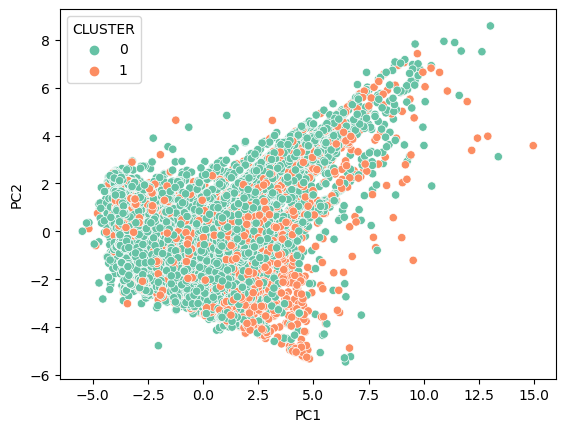

In [64]:
pc=pd.DataFrame({"PC1":x,"PC2":y,"CLUSTER":labels})
sns.scatterplot(x=pc["PC1"],y=pc["PC2"],hue=pc["CLUSTER"],palette="Set2")

## 5. Modeling
1. Handling imbalanced data
2. Model selection and model evaluation
* After found the best model, we would like to tune the model a little bit to make it fit better
* Grid search is one of the ways to do this kind of job for us
* We give it a set of parameters and it will exaustively try every combination of the possible choices

In [65]:
inlist=['Gender', 'Age_class', 'CreditLine_class', 'status0504_class',
       'status0505_class', 'status0506_class', 'status0507_class',
       'status0508_class', 'status0509_class', 'status_sum', 'payment_diff_05',
       'payment_diff_06', 'payment_diff_07', 'payment_diff_08',
       'payment_diff_09', 'Education_PhD', 'Education_elementary school',
       'Education_high school', 'Education_master', 'Education_middle school',
       'Education_others', 'Education_university', 'Marital status_divorce',
       'Marital status_married', 'Marital status_others',
       'Marital status_single']

In [66]:
from imblearn.over_sampling import RandomOverSampler

#oversampling minority class using random sampling
ROS = RandomOverSampler(random_state = 11) 
os_rs_X, os_rs_Y = ROS.fit_resample(x_train,y_train)
os_rs_X = pd.DataFrame(data = os_rs_X,columns=inlist)
os_rs_Y = pd.DataFrame(data = os_rs_Y,columns=['default'])

In [67]:
from imblearn.under_sampling import RandomUnderSampler

#undersampling majority class using random sampling
RUS = RandomUnderSampler(random_state = 11)
us_rs_X,us_rs_Y = RUS.fit_resample(x_train,y_train)
us_rs_X = pd.DataFrame(data = us_rs_X,columns=inlist)
us_rs_Y = pd.DataFrame(data = us_rs_Y,columns=['default'])

In [68]:
data_in = [[x_train,y_train],
           [os_rs_X, os_rs_Y],
           [us_rs_X, us_rs_Y]]

In [69]:
def evl(model,data):
    for features, labels in data:
        model.fit(features, labels)
        predict_test = model.predict(x_test) 
        cm=confusion_matrix(y_test,predict_test)
        print('auc:%.3f' %roc_auc_score(y_test, predict_test))
        print("AccuracyScore:%.3f" %accuracy_score(y_test,predict_test))
        print("Precision:%.3f" %precision_score(y_test,predict_test,average='weighted'))
        print("False Alarm Rate:%.3f" %(cm[1][0]/(cm[1][0]+cm[1][1])))

In [70]:
# decision tree with three datasets
dt = DecisionTreeClassifier(criterion='gini', random_state=1234)
evl(dt,data_in)

auc:0.585
AccuracyScore:0.710
Precision:0.717
False Alarm Rate:0.635
auc:0.591
AccuracyScore:0.710
Precision:0.720
False Alarm Rate:0.620
auc:0.598
AccuracyScore:0.594
Precision:0.724
False Alarm Rate:0.394


In [71]:
# logistic regression with three datasets
logit  = LogisticRegression(C=1.0, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=1234, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
evl(logit,data_in)

auc:0.586
AccuracyScore:0.804
Precision:0.780
False Alarm Rate:0.798
auc:0.651
AccuracyScore:0.704
Precision:0.754
False Alarm Rate:0.444
auc:0.649
AccuracyScore:0.700
Precision:0.753
False Alarm Rate:0.442


In [72]:
# random forest with three datasets
RFC = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=1234)
evl(RFC,data_in)

auc:0.613
AccuracyScore:0.799
Precision:0.771
False Alarm Rate:0.713
auc:0.638
AccuracyScore:0.781
Precision:0.764
False Alarm Rate:0.614
auc:0.685
AccuracyScore:0.711
Precision:0.775
False Alarm Rate:0.360


In [73]:
KNN = KNeighborsClassifier(n_neighbors=30,n_jobs=-1)
evl(KNN,data_in)

auc:0.576
AccuracyScore:0.801
Precision:0.775
False Alarm Rate:0.821
auc:0.629
AccuracyScore:0.679
Precision:0.740
False Alarm Rate:0.459
auc:0.642
AccuracyScore:0.714
Precision:0.750
False Alarm Rate:0.484


In [74]:
# Do grid search to find the better parameter combination from a set of given choices
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

def search_model(x_train, y_train, est, param_grid, cv):
    model = GridSearchCV(estimator  = est, # the estimator/machine learning model
                                     param_grid = param_grid, # parameter grid
                                     scoring = 'f1_weighted', # assign a scoring method 
                                     verbose = 10, # how much text output do we want during the searching process
                                     n_jobs = -1, # the number of process we want to use for the searching job
                                     cv = cv) # number of folds of cross validation
    # Fit Grid Search Model
    model.fit(x_train, y_train)   # refit the model to the data
    return model

In [75]:
# this is the parameter choices we would like to try
param_grid = {'n_estimators':[100,300],
             'max_depth':[2,4],
             'max_leaf_nodes': [4,8,16]}

RF = search_model(us_rs_X, us_rs_Y, RandomForestClassifier(), param_grid, 3)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [76]:
# check out the searching results
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.cv_results_) 

Best score: 0.688
Best parameters set: {'max_depth': 4, 'max_leaf_nodes': 16, 'n_estimators': 300}
Scores: {'mean_fit_time': array([0.42266623, 1.22100258, 0.46866385, 1.17633279, 0.39900104,
       1.14199694, 0.50700037, 1.39699777, 0.50200025, 1.41633336,
       0.51499629, 1.18467673]), 'std_fit_time': array([0.00817919, 0.04060429, 0.01862432, 0.04984253, 0.01272942,
       0.01098249, 0.01023251, 0.02122874, 0.00496693, 0.05429584,
       0.00454683, 0.05896784]), 'mean_score_time': array([0.03966737, 0.1039989 , 0.04033478, 0.10200047, 0.0396657 ,
       0.10333411, 0.03799979, 0.10366758, 0.03999988, 0.0843331 ,
       0.04100132, 0.06834078]), 'std_score_time': array([0.00124757, 0.00374164, 0.00286822, 0.00081702, 0.0016989 ,
       0.00368127, 0.00081887, 0.00262464, 0.00081605, 0.0068478 ,
       0.00081595, 0.00094823]), 'param_max_depth': masked_array(data=[2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4],
             mask=[False, False, False, False, False, False, False, False,
    

In [77]:
data=[[us_rs_X, us_rs_Y]]
RFF = RandomForestClassifier(n_estimators = 300, max_depth = 4, max_leaf_nodes = 16,n_jobs=-1,random_state=1234)
evl(RFF,data)

auc:0.686
AccuracyScore:0.772
Precision:0.782
False Alarm Rate:0.468


## 6. Model Ensemble
* The result from only one model could be biased or limited. 
* So sometime we would like to combine different models' results to make it a little more comprehensive

In [78]:
# perform model ensemble
# take advantage of some different models, like differenct perspectives
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 4, max_leaf_nodes = 8) # tuned random forest as our first one
clf2 = KNeighborsClassifier(n_neighbors=30) # K nearest neighbors with K equals to 30
clf3 = LogisticRegression (C=1.0, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', 
                           penalty='l2', solver='liblinear', tol=0.0001) # logistic regression with class_weight

# we can use hard voting or soft voting method when ensemble our three models
eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, us_rs_X, us_rs_Y, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.68 (+/- 0.01) [Random_Forest]
Accuracy: 0.64 (+/- 0.01) [KNN]
Accuracy: 0.65 (+/- 0.01) [Logistic]
Accuracy: 0.67 (+/- 0.01) [Ensemble]


In [79]:
evl(eclf,data)

auc:0.673
AccuracyScore:0.753
Precision:0.772
False Alarm Rate:0.468
